Loading Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aliredaelblgihy/social-media-engagement-report")

print("Path to dataset files:", path)

c:\Users\haadh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\haadh\.cache\kagglehub\datasets\aliredaelblgihy\social-media-engagement-report\versions\1


Displaying first few rows to get an initial overview

In [4]:
import pandas as pd
data = pd.read_excel(path + "/social_media_engagement_data.xlsx")
data.head()

Platform                               Post ID Post Type  \
0   LinkedIn  d49dadb4-fc1e-4775-88ad-d60b75cf5123     Video   
1  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
2  Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8     Video   
3    Twitter  0b5a3e70-c556-43cb-ad4f-a1d0003348bc     Image   
4   Facebook  a7d3e958-e2fe-411e-a24a-b96e821fc050      Link   

                                        Post Content          Post Timestamp  \
0                     Want that according same wish. 2021-04-23 08:19:49.255   
1                       Increase fast partner south. 2023-07-30 06:40:06.356   
2         Lawyer behavior born window couple sister. 2021-12-05 03:56:53.212   
3                          Street great decade must. 2021-09-28 20:39:00.228   
4  At clear meeting with reason ground continue c... 2023-02-27 17:51:21.425   

   Likes  Comments  Shares  Impressions  Reach  Engagement Rate  Audience Age  \
0    415        77      85         2619   1842            31.32            29   
1    908       125      85         1223   3884            28.78            48   
2    412       419      58         2165    849           104.71            55   
3    667       153      29         7191   3519            24.13            54   
4    659       215      34         3312   2032            44.69            33   

  Audience Gender             Audience Location Audience Interests  \
0           Other                United Kingdom            respond   
1            Male                        Greece         population   
2            Male  United States Virgin Islands            himself   
3           Other                        Zambia               safe   
4           Other                   Afghanistan               well   

                            Campaign ID Sentiment Influencer ID  
0                                   NaN  Negative           NaN  
1                                   NaN   Neutral           NaN  
2                                   NaN   Neutral           NaN  
3                                   NaN       NaN           NaN  
4  6052b8d2-3403-4447-b0b4-c5ce20e6c8d0       NaN           NaN

Examining the dataset shape

In [3]:
data.shape

(100000, 18)

Examining the data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Likes               100000 non-null  int64         
 6   Comments            100000 non-null  int64         
 7   Shares              100000 non-null  int64         
 8   Impressions         100000 non-null  int64         
 9   Reach               100000 non-null  int64         
 10  Engagement Rate     100000 non-null  float64       
 11  Audience Age        100000 non-null  int64         
 12  Audience Gender     100000 non-null  object        
 13  Audience Location   100000 non

Examining the column names

In [5]:
data.columns

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
       'Engagement Rate', 'Audience Age', 'Audience Gender',
       'Audience Location', 'Audience Interests', 'Campaign ID', 'Sentiment',
       'Influencer ID'],
      dtype='object')

Filtering Instagram dataset

In [5]:
insta_df = data[data['Platform'] == "Instagram"].copy()

Filtering Facebook dataset

In [6]:
fb_df = data[data['Platform'] == "Facebook"].copy()
print(f"Facebook dataset shape: {fb_df.shape}")

Facebook dataset shape: (24879, 18)


Filtering Twitter dataset

In [7]:
twitter_df = data[data['Platform'] == "Twitter"].copy()
print(f"Twitter dataset shape: {twitter_df.shape}")

Twitter dataset shape: (25160, 18)


Filtering LinkedIn dataset

In [8]:
linkedin_df = data[data['Platform'] == "LinkedIn"].copy()
print(f"LinkedIn dataset shape: {linkedin_df.shape}")

LinkedIn dataset shape: (25126, 18)


Platform distribution summary

In [9]:
# Summary of all platform dataframes
print("=" * 50)
print("PLATFORM DATAFRAMES SUMMARY")
print("=" * 50)
print(f"Instagram posts: {len(insta_df):,}")
print(f"Facebook posts:  {len(fb_df):,}")
print(f"Twitter posts:   {len(twitter_df):,}")
print(f"LinkedIn posts:  {len(linkedin_df):,}")
print(f"Total posts:     {len(data):,}")
print("=" * 50)

PLATFORM DATAFRAMES SUMMARY
Instagram posts: 24,835
Facebook posts:  24,879
Twitter posts:   25,160
LinkedIn posts:  25,126
Total posts:     100,000


In [7]:
insta_df.shape

(24835, 18)

Data preprocessing

In [8]:
insta_df = insta_df.drop_duplicates()

In [9]:
insta_df.shape

(24835, 18)

Checking null values

In [10]:
insta_df.isnull().sum()

Platform                  0
Post ID                   0
Post Type                 0
Post Content              0
Post Timestamp            0
Likes                     0
Comments                  0
Shares                    0
Impressions               0
Reach                     0
Engagement Rate           0
Audience Age              0
Audience Gender           0
Audience Location         0
Audience Interests        0
Campaign ID           19876
Sentiment             12451
Influencer ID         22391
dtype: int64

Dealing with null values

In [11]:
insta_df = insta_df.drop(columns=['Campaign ID', 'Sentiment', 'Influencer ID'])


In [12]:
insta_df.head()

Platform                               Post ID Post Type  \
1   Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
2   Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8     Video   
6   Instagram  0510219c-c413-4203-a9c6-e176a299ce10      Link   
12  Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
13  Instagram  4455db75-4f0c-4781-b2bc-92534300689b      Link   

                                         Post Content          Post Timestamp  \
1                        Increase fast partner south. 2023-07-30 06:40:06.356   
2          Lawyer behavior born window couple sister. 2021-12-05 03:56:53.212   
6   Community seek Republican cold though ability ... 2022-09-28 06:32:05.117   
12                      Town find identify game your. 2022-05-12 15:41:21.902   
13  Reduce theory upon else someone significant wh... 2022-03-14 00:27:10.505   

    Likes  Comments  Shares  Impressions  Reach  Engagement Rate  \
1     908       125      85         1223   3884            28.78   
2     412       419      58         2165    849           104.71   
6     874       239      91         5681   1553            77.53   
12    870        92      15         1377   4829            20.23   
13    322       195     146         7970   3477            19.07   

    Audience Age Audience Gender             Audience Location  \
1             48            Male                        Greece   
2             55            Male  United States Virgin Islands   
6             41           Other                       Jamaica   
12            48            Male                         Sudan   
13            47          Female                         Nepal   

   Audience Interests  
1          population  
2             himself  
6              family  
12              money  
13            however

Checking outliers

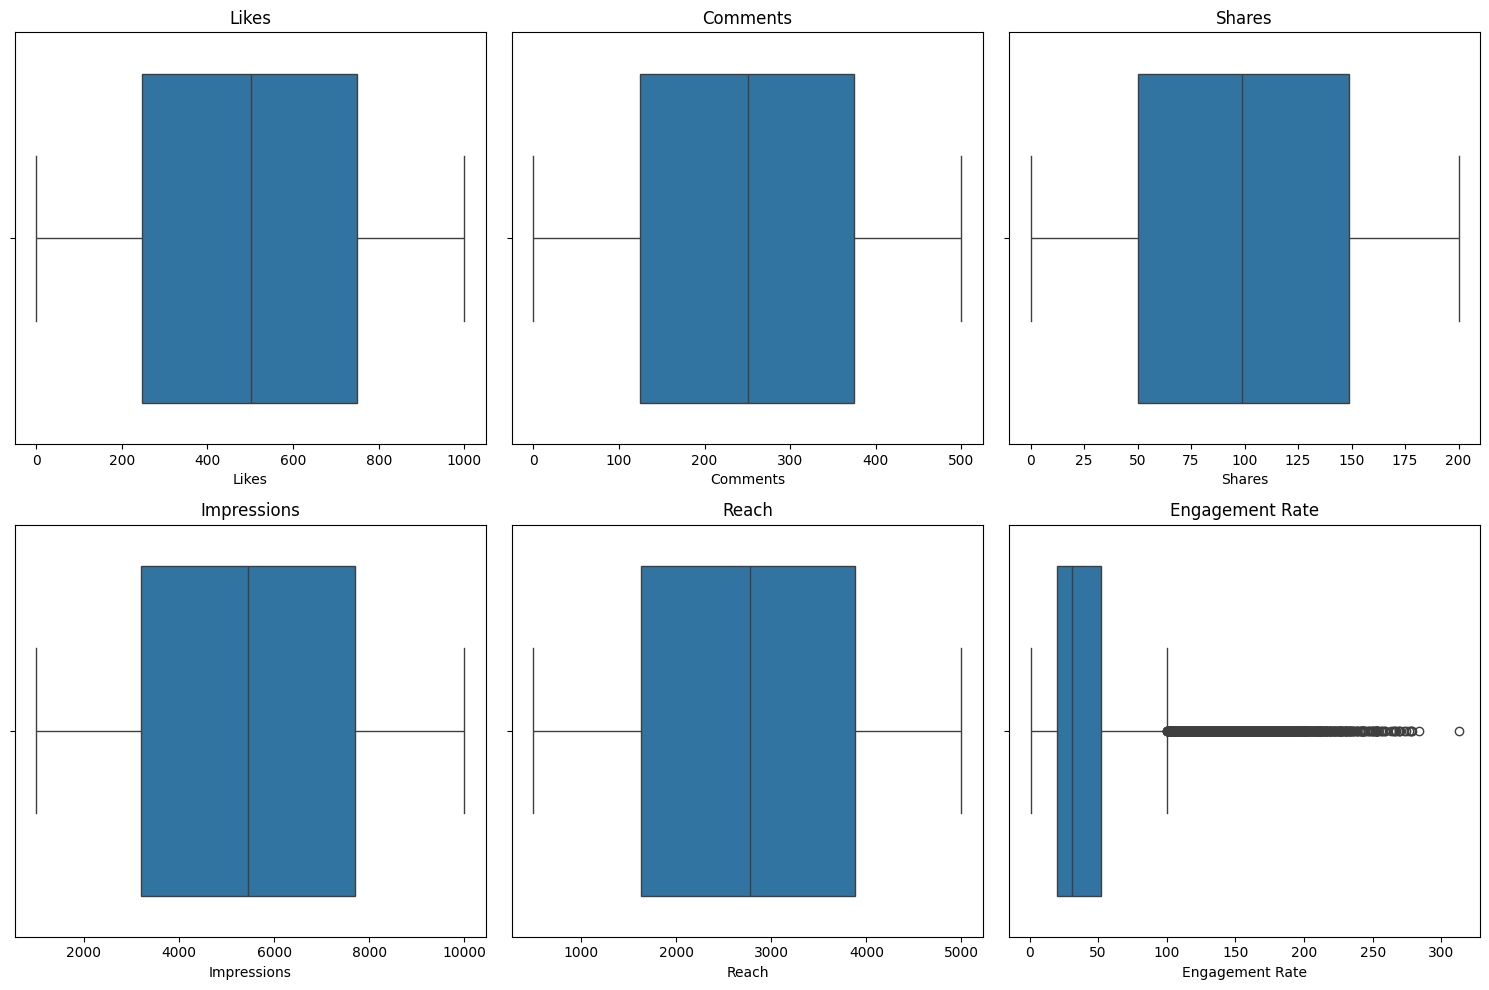

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=insta_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Post Type Distribution

In [14]:
print("Unique Post Types:\n", insta_df['Post Type'].unique())

Unique Post Types:
 ['Video' 'Link' 'Image']


In [15]:
print("\nPost Type Distribution:\n", insta_df['Post Type'].value_counts())


Post Type Distribution:
 Post Type
Link     8307
Video    8296
Image    8232
Name: count, dtype: int64


In [16]:
import plotly.express as px

post_type_counts = insta_df['Post Type'].value_counts()

fig = px.pie(
    names=post_type_counts.index,
    values=post_type_counts.values,
    title="Post Type Distribution"
)

fig.show()

Unique Audience Genders

In [17]:
print("\nUnique Audience Genders:\n", insta_df['Audience Gender'].unique())


Unique Audience Genders:
 ['Male' 'Other' 'Female']


In [18]:
print("\nAudience Gender Distribution:\n", insta_df['Audience Gender'].value_counts())


Audience Gender Distribution:
 Audience Gender
Male      8366
Female    8289
Other     8180
Name: count, dtype: int64


In [19]:
import plotly.express as px

fig = px.pie(
    insta_df,
    names='Audience Gender',
    title='Audience Gender Distribution',
    hole=0
)

fig.show()


In [20]:
print("\nUnique Audience Locations:\n", insta_df['Audience Location'].unique())


Unique Audience Locations:
 ['Greece' 'United States Virgin Islands' 'Jamaica' 'Sudan' 'Nepal'
 'Slovakia (Slovak Republic)' 'Sierra Leone' 'Costa Rica' 'Mexico'
 'Kiribati' 'Cocos (Keeling) Islands' 'Liechtenstein' 'Nicaragua'
 'Brunei Darussalam' 'Iceland' 'El Salvador' 'Reunion' "Cote d'Ivoire"
 'United States Minor Outlying Islands' 'Morocco' 'Iran' 'Argentina'
 'New Caledonia' 'Gibraltar' 'Venezuela' 'Sri Lanka' 'Ukraine'
 'Russian Federation' 'Dominican Republic' 'Denmark' 'Cyprus'
 'British Indian Ocean Territory (Chagos Archipelago)' 'Korea'
 'Micronesia' 'Pitcairn Islands' 'Cuba' 'Saint Vincent and the Grenadines'
 'Martinique' 'Greenland' 'Norfolk Island' 'Oman' 'Kazakhstan' 'Belgium'
 'Cameroon' 'New Zealand' 'Mali' 'Cape Verde' 'Bangladesh' 'Netherlands'
 'Maldives' 'Qatar' 'Afghanistan' 'Macao' 'Zambia' 'Sweden' 'Isle of Man'
 'Mozambique' 'Lebanon' 'Botswana' 'Sao Tome and Principe' 'Croatia'
 'Burundi' 'Mauritania' 'Germany' 'Zimbabwe' 'United Arab Emirates'
 'Tonga' 'P

In [21]:
print("\nAudience Location Distribution:\n", insta_df['Audience Location'].value_counts())


Audience Location Distribution:
 Audience Location
Korea                       213
Congo                       175
Central African Republic    137
Liberia                     126
Kuwait                      123
                           ... 
Maldives                     82
Kyrgyz Republic              76
United States of America     75
Montserrat                   74
Ghana                        69
Name: count, Length: 243, dtype: int64


<Axes: xlabel='Audience Location'>

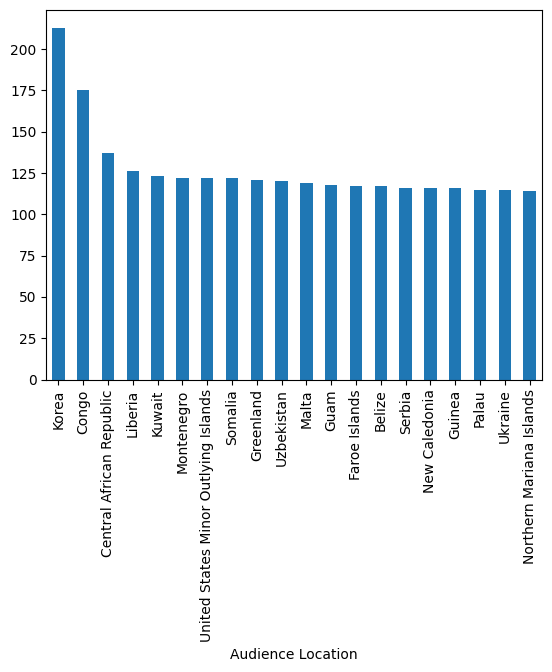

In [22]:
insta_df['Audience Location'].value_counts().head(20).plot(kind='bar')

Inspecting unique Post IDs (to verify duplicates or missing patterns)

In [23]:
print("\nTotal Unique Post IDs:", insta_df['Post ID'].nunique())
print("Any duplicated Post IDs?", insta_df['Post ID'].duplicated().any())


Total Unique Post IDs: 24835
Any duplicated Post IDs? False


 Checking date range of the dataset

In [24]:
insta_df['Post Timestamp'] = pd.to_datetime(insta_df['Post Timestamp'])

print("\nDate Range:")
print("Earliest Post:", insta_df['Post Timestamp'].min())
print("Latest Post:", insta_df['Post Timestamp'].max())


Date Range:
Earliest Post: 2021-03-08 20:23:00.110000
Latest Post: 2024-03-08 11:10:05.017000


In [25]:
insta_df['Post Timestamp'] = pd.to_datetime(insta_df['Post Timestamp'])

In [26]:
numeric_cols = ['Likes','Comments','Shares','Impressions','Reach','Engagement Rate','Audience Age']
insta_df[numeric_cols] = insta_df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [27]:
insta_df.describe()

Post Timestamp         Likes      Comments  \
count                          24835  24835.000000  24835.000000   
mean   2022-09-06 04:53:51.667831040    499.409946    250.458345   
min       2021-03-08 20:23:00.110000      0.000000      0.000000   
25%    2021-12-03 08:17:53.264499968    247.000000    125.000000   
50%       2022-09-05 19:39:08.048000    502.000000    251.000000   
75%    2023-06-09 23:41:01.014999808    749.000000    375.000000   
max       2024-03-08 11:10:05.017000   1000.000000    500.000000   
std                              NaN    288.948884    144.754645   

             Shares   Impressions         Reach  Engagement Rate  Audience Age  
count  24835.000000  24835.000000  24835.000000     24835.000000  24835.000000  
mean      99.467083   5467.568069   2755.253070        43.534515     41.570042  
min        0.000000   1000.000000    500.000000         0.720000     18.000000  
25%       50.000000   3211.000000   1629.000000        19.980000     30.000000  
50%       99.000000   5450.000000   2776.000000        30.770000     42.000000  
75%      149.000000   7700.500000   3877.000000        52.130000     54.000000  
max      200.000000  10000.000000   5000.000000       312.550000     65.000000  
std       57.903024   2596.533379   1298.951932        38.079719     13.862312

In [28]:
(insta_df['Engagement Rate'] > 100).sum() #why


np.int64(2102)

In [29]:
insta_df.columns

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
       'Engagement Rate', 'Audience Age', 'Audience Gender',
       'Audience Location', 'Audience Interests'],
      dtype='object')

In [30]:
insta_df['Year'] = insta_df['Post Timestamp'].dt.year
insta_df['Month'] = insta_df['Post Timestamp'].dt.month
insta_df['Day'] = insta_df['Post Timestamp'].dt.day
insta_df['Hour'] = insta_df['Post Timestamp'].dt.hour
insta_df['Weekday'] = insta_df['Post Timestamp'].dt.day_name()


Engagement rate vs Weekdays

<Axes: xlabel='Weekday', ylabel='Engagement Rate'>

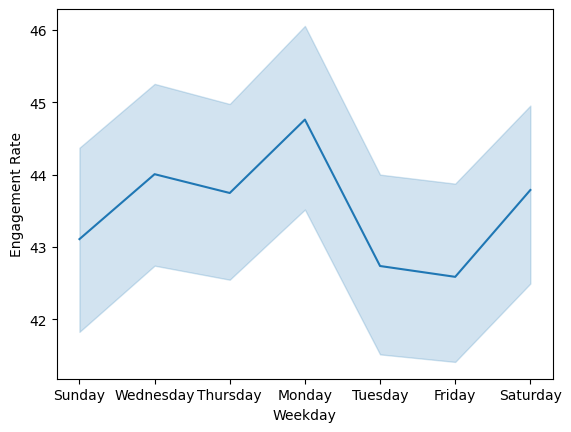

In [31]:
sns.lineplot(x='Weekday', y='Engagement Rate', data=insta_df)

Engagement rate vs Hours of days

<Axes: xlabel='Hour', ylabel='Engagement Rate'>

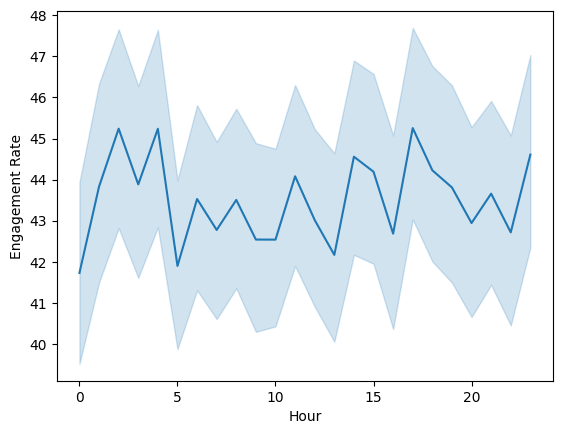

In [32]:
sns.lineplot(x='Hour', y='Engagement Rate', data=insta_df)


<Axes: xlabel='Likes', ylabel='Engagement Rate'>

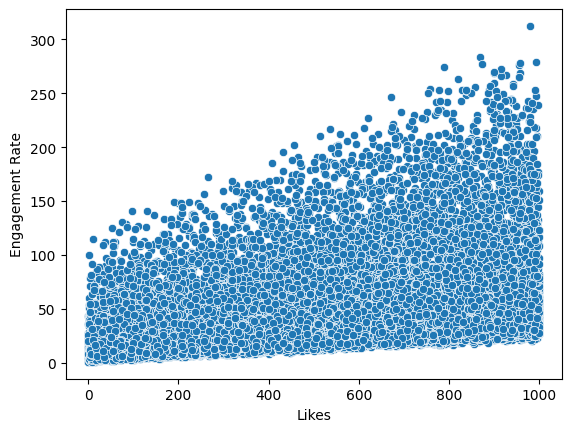

In [33]:
sns.scatterplot(x='Likes', y='Engagement Rate', data=insta_df)

<Axes: xlabel='Likes', ylabel='Engagement Rate'>

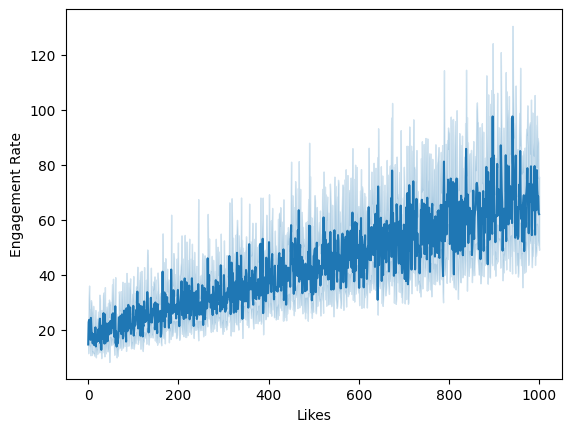

In [34]:
sns.lineplot(x='Likes', y='Engagement Rate', data=insta_df)


<Axes: >

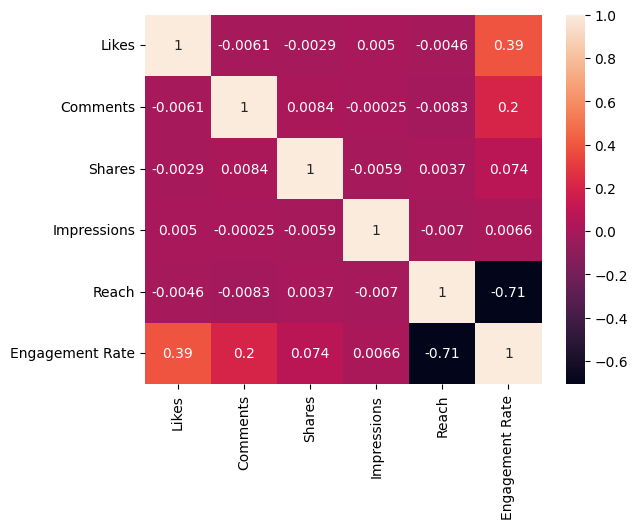

In [35]:
sns.heatmap(insta_df[['Likes','Comments','Shares','Impressions','Reach','Engagement Rate']].corr(), annot=True)


<Axes: xlabel='Reach', ylabel='Engagement Rate'>

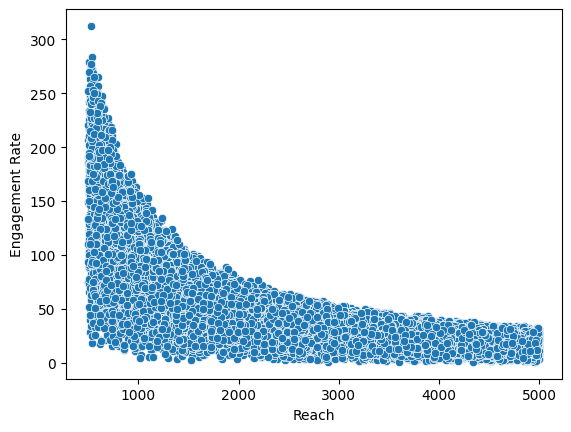

In [36]:
sns.scatterplot(x='Reach', y='Engagement Rate', data=insta_df)

<Axes: xlabel='Reach', ylabel='Engagement Rate'>

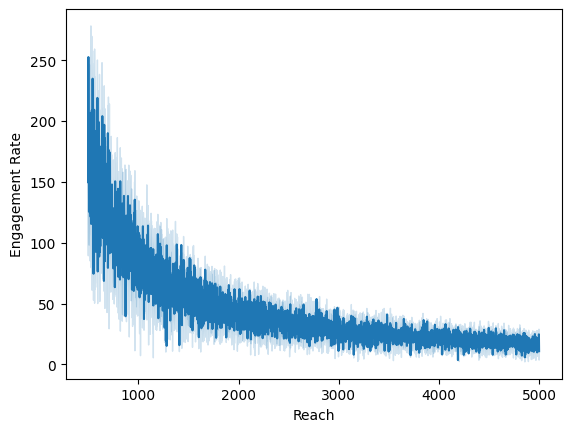

In [37]:
sns.lineplot(x='Reach', y='Engagement Rate', data=insta_df)

Computing Virality score

In [38]:
# Avoid division by zero (replace zeros in impressions or reach)
insta_df['Impressions'] = insta_df['Impressions'].replace(0, 1)
insta_df['Reach'] = insta_df['Reach'].replace(0, 1)

# Compute the Virality Score
insta_df['Virality Score'] = ((insta_df['Likes'] + insta_df['Comments'] + insta_df['Shares']) / insta_df['Impressions']) * (insta_df['Shares'] / insta_df['Reach'])* 100

# Display first few rows
print(insta_df[['Post ID', 'Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Virality Score']].head())


                                 Post ID  Likes  Comments  Shares  \
1   16ce29c5-2dc7-478f-9814-a86754f3ce8b    908       125      85   
2   6a6cc741-72f4-4111-95a0-c5ee04a175a8    412       419      58   
6   0510219c-c413-4203-a9c6-e176a299ce10    874       239      91   
12  80415748-a509-4fc6-8b55-74f2babe5dac    870        92      15   
13  4455db75-4f0c-4781-b2bc-92534300689b    322       195     146   

    Impressions  Reach  Virality Score  
1          1223   3884        2.000576  
2          2165    849        2.805202  
6          5681   1553        1.241857  
12         1377   4829        0.220391  
13         7970   3477        0.349304  


In [39]:
print(insta_df['Virality Score'].head(100))

1      2.000576
2      2.805202
6      1.241857
12     0.220391
13     0.349304
         ...   
399    0.170046
400    2.740758
402    0.110794
404    0.903337
407    0.963508
Name: Virality Score, Length: 100, dtype: float64


In [40]:
insta_df.columns

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
       'Engagement Rate', 'Audience Age', 'Audience Gender',
       'Audience Location', 'Audience Interests', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Virality Score'],
      dtype='object')

In [41]:
insta_df.groupby('Post Type')['Virality Score'].mean()


Post Type
Image    1.154728
Link     1.155110
Video    1.184444
Name: Virality Score, dtype: float64

In [42]:
import plotly.express as px
import plotly.graph_objects as go

To observe trends in audience interaction over time and detect when engagement increases or drops.

In [43]:
df_sorted = insta_df.sort_values('Post Timestamp')

px.line(
    df_sorted, x='Post Timestamp', y='Engagement Rate',
    title='Engagement Rate Over Time',
    template='plotly_white'
).show()


To track how the virality of posts changes over the posting timeline and identify peak viral periods.

In [44]:
px.line(
    df_sorted, x='Post Timestamp', y='Virality Score',
    title='Virality Score Over Time',
    template='plotly_white'
).show()


To discover the best days and hours to post based on posting frequency patterns.

In [45]:
insta_df['DayOfWeek'] = insta_df['Post Timestamp'].dt.day_name()
insta_df['Hour'] = insta_df['Post Timestamp'].dt.hour

heatmap_data = insta_df.groupby(['DayOfWeek','Hour']).size().reset_index(name='Count')

px.density_heatmap(
    heatmap_data, x='Hour', y='DayOfWeek', z='Count',
    title='Posting Frequency by Day and Hour',
    template='plotly_white', color_continuous_scale='Blues'
).show()


In [46]:
px.box(
    insta_df, x='Post Type', y='Engagement Rate',
    title='Engagement Rate by Post Type',
    template='plotly_white'
).show()


In [47]:
px.box(
    insta_df, x='Post Type', y='Virality Score',
    title='Virality by Post Type',
    template='plotly_white'
).show()


To increase both reach + engagement:
 Post best-performing content types
Post at peak activity times

 Tailor content to audience demographics Encourage shares + comments Improve visual/creative quality Use hashtags + keywords Engage back quickly Use collaborations Learn from high virality patterns Run A/B testing

Best-Performing Content Types

In [48]:
insta_df.groupby('Post Type').agg({
    'Engagement Rate': 'mean',
    'Reach': 'mean',
    'Virality Score': 'mean'
}).sort_values('Engagement Rate', ascending=False)


Engagement Rate        Reach  Virality Score
Post Type                                              
Video            43.693862  2749.855955        1.184444
Link             43.521093  2763.102323        1.155110
Image            43.387473  2752.771380        1.154728

Peak Activity Times (Best Time to Post)

In [49]:
insta_df['Post Timestamp'] = pd.to_datetime(insta_df['Post Timestamp'])
insta_df['Hour'] = insta_df['Post Timestamp'].dt.hour
insta_df['Day'] = insta_df['Post Timestamp'].dt.day_name()

insta_df.groupby(['Day', 'Hour'])['Engagement Rate'].mean().sort_values(ascending=False).head(10)


Day        Hour
Sunday     14      51.466552
Wednesday  17      50.021974
Thursday   2       49.696713
           3       49.506575
Monday     17      48.855379
           18      48.386405
           4       48.318562
Saturday   3       48.314492
Tuesday    23      48.211486
Saturday   2       48.046013
Name: Engagement Rate, dtype: float64

In [50]:
insta_df.columns

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
       'Engagement Rate', 'Audience Age', 'Audience Gender',
       'Audience Location', 'Audience Interests', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Virality Score', 'DayOfWeek'],
      dtype='object')

In [51]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [52]:
numeric_columns = ['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Virality Score']
correlation_matrix = insta_df[numeric_columns].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.round(2).values,
    texttemplate="%{text}",
    textfont={"size": 10}
))

fig.update_layout(
    title='Correlation Matrix of Key Metrics',
    width=600,
    height=600
)
fig.show()

In [53]:
engagement_by_hour = insta_df.groupby('Hour')['Engagement Rate'].mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=engagement_by_hour.index, y=engagement_by_hour.values,
                        mode='lines+markers', name='Engagement Rate',
                        line=dict(color='royalblue', width=3)))

fig.update_layout(
    title='Average Engagement Rate by Hour of Day',
    xaxis_title='Hour of Day',
    yaxis_title='Average Engagement Rate',
    height=400
)
fig.show()

# Engagement by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_weekday = insta_df.groupby('Weekday')['Engagement Rate'].mean().reindex(weekday_order)

fig = go.Figure()
fig.add_trace(go.Bar(x=engagement_by_weekday.index, y=engagement_by_weekday.values,
                    marker_color='coral'))

fig.update_layout(
    title='Average Engagement Rate by Weekday',
    xaxis_title='Day of Week',
    yaxis_title='Average Engagement Rate',
    height=400
)
fig.show()


In [54]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Reach vs Engagement Rate', 'Likes vs Comments',
                   'Impressions vs Reach', 'Shares vs Virality Score')
)

fig.add_trace(go.Scatter(x=insta_df['Reach'], y=insta_df['Engagement Rate'],
                        mode='markers', name='Reach vs Engagement'), row=1, col=1)

fig.add_trace(go.Scatter(x=insta_df['Likes'], y=insta_df['Comments'],
                        mode='markers', name='Likes vs Comments'), row=1, col=2)

fig.add_trace(go.Scatter(x=insta_df['Impressions'], y=insta_df['Reach'],
                        mode='markers', name='Impressions vs Reach'), row=2, col=1)

fig.add_trace(go.Scatter(x=insta_df['Shares'], y=insta_df['Virality Score'],
                        mode='markers', name='Shares vs Virality'), row=2, col=2)

fig.update_layout(height=600, title_text="Relationship Analysis", showlegend=False)
fig.update_xaxes(title_text="Reach", row=1, col=1)
fig.update_yaxes(title_text="Engagement Rate", row=1, col=1)
fig.update_xaxes(title_text="Likes", row=1, col=2)
fig.update_yaxes(title_text="Comments", row=1, col=2)
fig.update_xaxes(title_text="Impressions", row=2, col=1)
fig.update_yaxes(title_text="Reach", row=2, col=1)
fig.update_xaxes(title_text="Shares", row=2, col=2)
fig.update_yaxes(title_text="Virality Score", row=2, col=2)
fig.show()

In [55]:
top_posts = insta_df.nlargest(10, 'Engagement Rate')[['Post Type', 'Engagement Rate', 'Reach', 'Likes', 'Comments', 'Shares']]

fig = go.Figure(data=[
    go.Bar(name='Engagement Rate', x=top_posts.index, y=top_posts['Engagement Rate']),
    go.Bar(name='Reach (scaled)', x=top_posts.index, y=top_posts['Reach']/top_posts['Reach'].max())
])

fig.update_layout(
    title='Top 10 Posts by Engagement Rate',
    barmode='group',
    height=400
)
fig.show()

In [62]:
location_performance = insta_df.groupby('Audience Location').agg({
    'Engagement Rate': 'mean',
    'Reach': 'mean',
    'Virality Score': 'mean'
}).round(4).reset_index()

fig = px.scatter(location_performance, x='Reach', y='Engagement Rate',
                 size='Virality Score', color='Audience Location',
                 hover_data=['Audience Location'],
                 title='Performance by Audience Location')
fig.show()  #final

In [63]:
# Filter to top 15 locations by post count for cleaner visualization
top_locations = insta_df['Audience Location'].value_counts().head(15).index
filtered_df = insta_df[insta_df['Audience Location'].isin(top_locations)]

location_performance = filtered_df.groupby('Audience Location').agg({
    'Engagement Rate': 'mean',
    'Reach': 'mean',
    'Virality Score': 'mean'
}).round(4).reset_index()

fig = px.scatter(location_performance, 
                 x='Reach', 
                 y='Engagement Rate',
                 size='Virality Score', 
                 color='Audience Location',
                 hover_data=['Audience Location', 'Virality Score'],
                 title='Performance by Top 15 Audience Locations',
                 size_max=40,
                 opacity=0.7)

fig.update_layout(
    width=1000,
    height=700,
    font=dict(size=12),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        bgcolor="rgba(255, 255, 255, 0.8)"
    )
)

fig.update_traces(marker=dict(line=dict(width=1, color='white')))
fig.show()

# Project Enhancement: Social Media Content Optimization

This extended section introduces a reusable pipeline to turn the raw multi-platform dataset into actionable insights for when/what to post.

**Objectives**:
- Standardize & clean data across all platforms.
- Engineer robust engagement & virality metrics.
- Identify best posting hours, weekdays, and post types per platform.
- Provide recommendation tables for companies/content creators.

**Key KPI Definitions (will be computed)**:
- True Engagement Rate = (Likes + Comments + Shares) / Reach * 100.
- Interaction Rate = (Comments + Shares) / Impressions * 100.
- Share Amplification = Shares / Reach * 100.
- Exposure Efficiency = Reach / Impressions * 100.
- Normalized Virality Score = weighted z-score blend of interaction & amplification.

**Next**: Run pipeline code cells below.


In [57]:
# Imports & configuration for enhanced pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', 100)

# Use existing path if already defined earlier; otherwise expect it's set.
try:
    path
except NameError:
    raise RuntimeError("Dataset path variable 'path' not defined. Run the earlier download cell first.")

raw_path = path + "/social_media_engagement_data.xlsx"

# 1. Data Loading with robust timestamp parsing

def parse_timestamp(val):
    """Parse timestamp that may be HH:MM.S or full datetime; return pandas Timestamp or NaT."""
    if pd.isna(val):
        return pd.NaT
    # Try full datetime first
    for fmt in (None, '%Y-%m-%d %H:%M:%S', '%d/%m/%Y %H:%M:%S', '%m/%d/%Y %H:%M:%S'):
        try:
            if fmt:
                return pd.to_datetime(val, format=fmt)
            else:
                return pd.to_datetime(val)
        except Exception:
            continue
    # Fallback: treat as HH:MM.S or HH:MM:SS.m if only time present -> assign dummy date
    try:
        # Replace possible '.' with ':' for seconds fraction normalization
        cleaned = str(val).replace(' ', '').replace('\n','')
        # If format like 19:49.3 -> interpret as MM:SS.s? We'll attempt general parser
        t = pd.to_timedelta(cleaned)
        # Use a constant base date for all (e.g., 2024-01-01) + time delta
        base = pd.Timestamp('2024-01-01')
        return base + t
    except Exception:
        return pd.NaT


def load_data(path: str) -> pd.DataFrame:
    df = pd.read_excel(path)
    # Ensure expected columns exist
    required_cols = ['Platform','Post ID','Post Type','Post Content','Post Timestamp','Likes','Comments','Shares','Impressions','Reach','Engagement Rate','Audience Age','Audience Gender','Audience Location']
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        print(f"Warning: Missing columns: {missing}")
    return df

# 2. Cleaning & standardization

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Parse timestamps
    df['Post Timestamp Parsed'] = df['Post Timestamp'].apply(parse_timestamp)
    # Coerce numeric columns
    num_cols = ['Likes','Comments','Shares','Impressions','Reach','Engagement Rate','Audience Age']
    for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    # Drop obvious duplicates on Post ID
    if 'Post ID' in df.columns:
        before = len(df)
        df = df.drop_duplicates(subset=['Post ID'])
        after = len(df)
        if before != after:
            print(f"Removed {before-after} duplicate posts.")
    # Basic anomaly filtering: negative values and absurd engagement (> 150)
    for c in ['Likes','Comments','Shares','Impressions','Reach']:
        if c in df.columns:
            df = df[df[c] >= 0]
    if 'Engagement Rate' in df.columns:
        df = df[df['Engagement Rate'].between(0,150)]
    return df

# 3. Feature engineering

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    ts = df['Post Timestamp Parsed']
    df['Year'] = ts.dt.year
    df['Month'] = ts.dt.month
    df['Day'] = ts.dt.day
    df['Hour'] = ts.dt.hour
    df['Weekday'] = ts.dt.day_name()
    df['Weekend'] = df['Weekday'].isin(['Saturday','Sunday'])
    # KPI calculations
    with np.errstate(divide='ignore', invalid='ignore'):
        df['True Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Reach'] * 100
        df['Interaction Rate'] = (df['Comments'] + df['Shares']) / df['Impressions'] * 100
        df['Share Amplification'] = df['Shares'] / df['Reach'] * 100
        df['Exposure Efficiency'] = df['Reach'] / df['Impressions'] * 100
    # Replace inf with NaN then handle
    df = df.replace([np.inf, -np.inf], np.nan)
    # Normalized Virality Score via z-scores
    components = ['Interaction Rate','Share Amplification']
    for c in components:
        if c in df.columns:
            df[f'z_{c}'] = stats.zscore(df[c].fillna(df[c].median()))
    if all(f'z_{c}' in df.columns for c in components):
        df['Virality Score v2'] = (df['z_Interaction Rate']*0.6 + df['z_Share Amplification']*0.4)
    return df

# 4. Aggregation & Insights

def aggregate_insights(df: pd.DataFrame):
    insights = {}
    # Best hour per platform (median True Engagement Rate)
    if 'Platform' in df.columns:
        insights['best_hours'] = (df.groupby(['Platform','Hour'])['True Engagement Rate']
                                    .median().reset_index()
                                    .sort_values(['Platform','True Engagement Rate'], ascending=[True, False])
                                    .groupby('Platform').head(3))
        # Best weekday per platform
        order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        df['Weekday'] = pd.Categorical(df['Weekday'], categories=order, ordered=True)
        insights['best_weekdays'] = (df.groupby(['Platform','Weekday'])['True Engagement Rate']
                                       .median().reset_index()
                                       .sort_values(['Platform','True Engagement Rate'], ascending=[True, False])
                                       .groupby('Platform').head(3))
        # Post type performance
        insights['post_type_perf'] = (df.groupby(['Platform','Post Type'])['True Engagement Rate']
                                        .median().reset_index()
                                        .sort_values(['Platform','True Engagement Rate'], ascending=[True, False])
                                        .groupby('Platform').head(5))
    return insights

# 5. Recommendation synthesis

def build_recommendations(insights: dict) -> pd.DataFrame:
    rows = []
    platforms = sorted(set(insights['best_hours']['Platform'])) if 'best_hours' in insights else []
    for p in platforms:
        hours = insights['best_hours'][insights['best_hours']['Platform']==p]['Hour'].tolist()
        weekdays = insights['best_weekdays'][insights['best_weekdays']['Platform']==p]['Weekday'].tolist() if 'best_weekdays' in insights else []
        types = insights['post_type_perf'][insights['post_type_perf']['Platform']==p]['Post Type'].tolist() if 'post_type_perf' in insights else []
        rows.append({
            'Platform': p,
            'Top Hours (median TER)': hours,
            'Top Weekdays (median TER)': weekdays,
            'Best Post Types': types
        })
    return pd.DataFrame(rows)

# Execute pipeline
raw_df = load_data(raw_path)
clean_df = clean_data(raw_df)
feat_df = engineer_features(clean_df)
insights = aggregate_insights(feat_df)
recommendations_df = build_recommendations(insights)

print("Recommendations summary (top suggestions per platform):")
print(recommendations_df)

# Show sample of engineered metrics
print("\nSample engineered features:")
print(feat_df[['Platform','Post ID','True Engagement Rate','Interaction Rate','Share Amplification','Exposure Efficiency','Virality Score v2']].head())

Recommendations summary (top suggestions per platform):
    Platform Top Hours (median TER)      Top Weekdays (median TER)  \
0   Facebook             [16, 3, 2]    [Tuesday, Friday, Thursday]   
1  Instagram             [23, 4, 8]     [Monday, Thursday, Sunday]   
2   LinkedIn            [19, 7, 21]  [Friday, Wednesday, Thursday]   
3    Twitter            [3, 22, 15]   [Saturday, Friday, Thursday]   

        Best Post Types  
0  [Link, Video, Image]  
1  [Video, Link, Image]  
2  [Video, Image, Link]  
3  [Link, Image, Video]  

Sample engineered features:
    Platform                               Post ID  True Engagement Rate  \
0   LinkedIn  d49dadb4-fc1e-4775-88ad-d60b75cf5123             31.324647   
1  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b             28.784758   
2  Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8            104.711425   
3    Twitter  0b5a3e70-c556-43cb-ad4f-a1d0003348bc             24.126172   
4   Facebook  a7d3e958-e2fe-411e-a24a-b96e821fc050    

C:\Users\haadh\AppData\Local\Temp\ipykernel_44884\4025887458.py:122: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Content Niche Classification

This cell analyzes `Post Content` text and assigns a niche/category to each post based on keyword patterns and topic modeling.

In [58]:
import re
from collections import Counter

# Define niche categories with keywords
niche_keywords = {
    'Politics': ['vote', 'election', 'government', 'political', 'campaign', 'congress', 'president', 'democracy', 'policy'],
    'Business': ['business', 'company', 'market', 'economy', 'investment', 'finance', 'corporate', 'entrepreneur', 'startup'],
    'Technology': ['tech', 'software', 'digital', 'innovation', 'ai', 'computer', 'data', 'cyber', 'app'],
    'Health': ['health', 'medical', 'wellness', 'fitness', 'doctor', 'hospital', 'disease', 'treatment', 'nutrition'],
    'Sports': ['sport', 'game', 'player', 'team', 'match', 'athlete', 'competition', 'championship', 'tournament'],
    'Entertainment': ['movie', 'music', 'celebrity', 'show', 'entertainment', 'film', 'artist', 'performance', 'actor'],
    'Education': ['education', 'school', 'student', 'learning', 'university', 'teacher', 'course', 'study', 'academic'],
    'Travel': ['travel', 'trip', 'destination', 'vacation', 'tourism', 'journey', 'explore', 'adventure', 'visit'],
    'Food': ['food', 'recipe', 'restaurant', 'cooking', 'meal', 'cuisine', 'chef', 'delicious', 'taste'],
    'Fashion': ['fashion', 'style', 'clothing', 'outfit', 'trend', 'designer', 'wardrobe', 'beauty', 'look'],
    'Lifestyle': ['life', 'lifestyle', 'living', 'home', 'family', 'daily', 'routine', 'experience', 'personal'],
    'Social Issues': ['community', 'society', 'social', 'people', 'public', 'citizen', 'rights', 'justice', 'activism'],
    'Environment': ['environment', 'climate', 'nature', 'green', 'sustainable', 'eco', 'planet', 'conservation', 'energy'],
    'Legal': ['law', 'legal', 'court', 'lawyer', 'attorney', 'justice', 'regulation', 'compliance', 'lawsuit']
}

def classify_niche(text):
    """Classify post content into a niche category based on keyword matching."""
    if pd.isna(text) or not isinstance(text, str):
        return 'Uncategorized'

    text_lower = text.lower()
    scores = {}

    for niche, keywords in niche_keywords.items():
        score = sum(1 for keyword in keywords if keyword in text_lower)
        if score > 0:
            scores[niche] = score

    if scores:
        return max(scores.items(), key=lambda x: x[1])[0]
    return 'General'

# Apply niche classification to the full dataset
feat_df['Content Niche'] = feat_df['Post Content'].apply(classify_niche)

# Display niche distribution
print("Content Niche Distribution:")
print(feat_df['Content Niche'].value_counts())

# Show sample with niches
print("\nSample posts with assigned niches:")
print(feat_df[['Platform', 'Post Content', 'Content Niche', 'True Engagement Rate']].head(20))

# Compute average engagement by niche
niche_performance = feat_df.groupby('Content Niche').agg({
    'True Engagement Rate': 'median',
    'Virality Score v2': 'median',
    'Post ID': 'count'
}).rename(columns={'Post ID': 'Post Count'}).sort_values('True Engagement Rate', ascending=False)

print("\nNiche Performance (sorted by median True Engagement Rate):")
print(niche_performance)

Content Niche Distribution:
Content Niche
General          56141
Technology       12957
Politics          4155
Environment       3571
Entertainment     2909
Social Issues     2649
Business          2597
Education         2367
Health            2222
Lifestyle         1930
Sports            1733
Legal             1547
Travel            1235
Fashion            753
Food               393
Name: count, dtype: int64

Sample posts with assigned niches:
     Platform                                       Post Content  \
0    LinkedIn                     Want that according same wish.   
1   Instagram                       Increase fast partner south.   
2   Instagram         Lawyer behavior born window couple sister.   
3     Twitter                          Street great decade must.   
4    Facebook  At clear meeting with reason ground continue c...   
5    Facebook             Vote American state change simply cup.   
6   Instagram  Community seek Republican cold though ability ...   
7    Li

In [59]:
# Export enhanced dataset with Content Niche to CSV
output_path = r'd:\DataViz_project\social_media_data_with_niches.csv'

# Select relevant columns for export
export_cols = ['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp Parsed',
               'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
               'True Engagement Rate', 'Interaction Rate', 'Share Amplification',
               'Exposure Efficiency', 'Virality Score v2', 'Content Niche',
               'Audience Age', 'Audience Gender', 'Audience Location', 'Hour', 'Weekday', 'Weekend']

feat_df[export_cols].to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✓ Exported enhanced dataset with Content Niche column to:\n  {output_path}")
print(f"✓ Total rows: {len(feat_df)}, Total columns: {len(export_cols)}")

PermissionError: [Errno 13] Permission denied: 'd:\\DataViz_project\\social_media_data_with_niches.csv'